#Packages:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Dataset:



This heart disease dataset is curated by combining 5 popular heart disease datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features. The five datasets used for its curation are:

- Cleveland
- Hungarian
- Switzerland
- Long Beach VA
- Statlog (Heart) Data Set.

# Displaying the dataset


In [2]:
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
print(df.shape)

(1190, 12)


In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


# Setting up even more libraries:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Cleaning up the dataset:


When we training machine learning models on datasets, we remove duplicates to avoid overfitting.

In [6]:
print(df.duplicated().sum())

272


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
print(df.duplicated().sum())

0


In [9]:
print(df.shape)

(918, 12)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


All values are non-null, but maybe some aren't reasonable in their contexts.

#Checking for outliers:


In [11]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


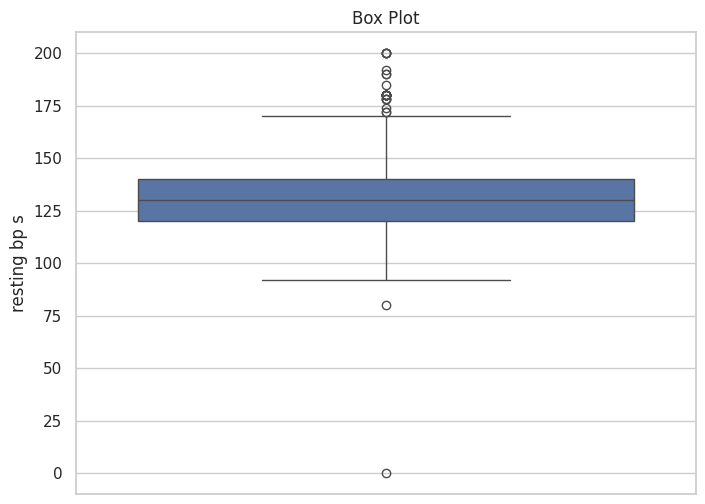

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='resting bp s')
plt.title('Box Plot')
plt.ylabel('resting bp s')
plt.show()

0 doesn't make sense as a value for beats per second, so we'll check to impute or delete it depending on how many rows exhibit this.


In [13]:
df['resting bp s'].value_counts()[0]

1

Since, it's only one entry, we can delete

In [14]:
df = df[df['resting bp s'] != 0]

In [15]:
print(pd.unique(df['cholesterol']))

[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 217 303 298 256 117 295 173 315 281 309 200
 336 355 326 171 491 271 274 394 221 126 305 220 242 347 344 358 169 181
   0 236 203 153 316 311 252 458 384 258 349 142 197 113 261 310 232 110
 123 170 369 152 244 165 337 300 333 385 322 564 239 293 407 149 199 417
 178 319 354 330 302 313 141 327 304 286 360 262 325 299 409 174 183 321
 353 335 278 157 176 131]


0 doesn't make sense in the context of a cholesterol measurement, so see how many there are to decide to remove or to impute.

In [16]:
df['cholesterol'].value_counts()[0]

171

In [17]:
df['cholesterol'][df['cholesterol'] == 0] = np.nan

<ipython-input-17-f59017757942>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['cholesterol'][df['cholesterol'] == 0] = np.nan


Since we can't afford to lose 172 entries, i will impute them, but before i must split the dataset to avoid training on the test data's medians.

In [18]:
print(pd.unique(df['cholesterol']))


[289. 180. 283. 214. 195. 339. 237. 208. 207. 284. 211. 164. 204. 234.
 273. 196. 201. 248. 267. 223. 184. 288. 215. 209. 260. 468. 188. 518.
 167. 224. 172. 186. 254. 306. 250. 177. 227. 230. 294. 264. 259. 175.
 318. 216. 340. 233. 205. 245. 194. 270. 213. 365. 342. 253. 277. 202.
 297. 225. 246. 412. 265. 182. 218. 268. 163. 529. 100. 206. 238. 139.
 263. 291. 229. 307. 210. 329. 147.  85. 269. 275. 179. 392. 466. 129.
 241. 255. 276. 282. 338. 160. 156. 272. 240. 393. 161. 228. 292. 388.
 166. 247. 331. 341. 243. 279. 198. 249. 168. 603. 159. 190. 185. 290.
 212. 231. 222. 235. 320. 187. 266. 287. 404. 312. 251. 328. 285. 280.
 192. 193. 308. 219. 257. 132. 226. 217. 303. 298. 256. 117. 295. 173.
 315. 281. 309. 200. 336. 355. 326. 171. 491. 271. 274. 394. 221. 126.
 305. 220. 242. 347. 344. 358. 169. 181.  nan 236. 203. 153. 316. 311.
 252. 458. 384. 258. 349. 142. 197. 113. 261. 310. 232. 110. 123. 170.
 369. 152. 244. 165. 337. 300. 333. 385. 322. 564. 239. 293. 407. 149.
 199. 

In [19]:
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop(['target'], axis =1 )

#Split into Training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [20]:
X_train['cholesterol'].fillna(X_train['cholesterol'].median(numeric_only = True), inplace=True)
X_test.fillna(X_train['cholesterol'].median(numeric_only = True), inplace=True)

<ipython-input-20-6df0ccad0d80>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['cholesterol'].fillna(X_train['cholesterol'].median(numeric_only = True), inplace=True)


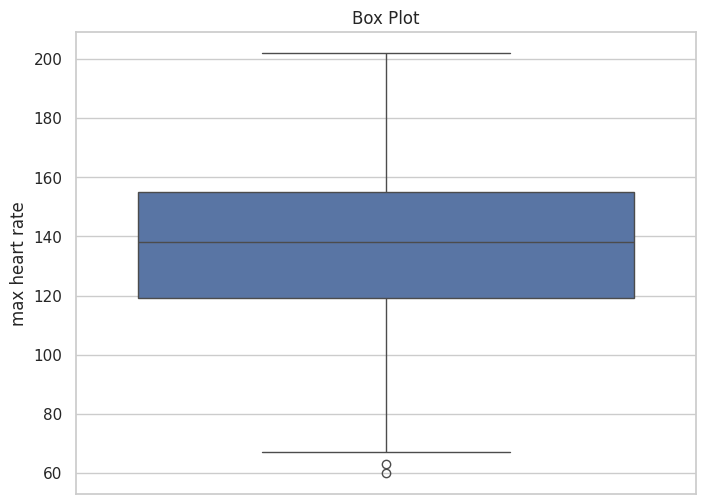

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train, y='max heart rate')
plt.title('Box Plot')
plt.ylabel('max heart rate')
plt.show()

Everything seems reasonable and we don't have any clear outliers.

We'll check to see if our data is close to 50-50 to be able to make sure our machine learning models aren't just picking the majority.

In [22]:
y_train.value_counts(normalize=True)

,proportion
target,
1,0.538881
0,0.461119


In [23]:
print(X_train.shape, y_train.shape)

(733, 11) (733,)


It is close enough, so now we can start training models!

#Trying Models:

We'll use a dictionary to store each model's accuracy

In [24]:
model_accuracy = {}

##Baseline Model:

In [25]:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Create a Majority Class baseline model
majority_model = DummyClassifier(strategy='most_frequent')

# Fit the model on the training data (no actual fitting is needed for this model)
majority_model.fit(X_train, y_train)

# Predict on the test data
y_pred_majority = majority_model.predict(X_test)

# Calculate accuracy
report_majority = classification_report(y_test, y_pred_majority, target_names=['not', 'heart disease'])

accuracy = accuracy_score(y_test, y_pred_majority)
model_accuracy['Baseline'] = accuracy
print('Majority Class Baseline Report:\n', report_majority)

Majority Class Baseline Report:
                precision    recall  f1-score   support

          not       0.00      0.00      0.00        72
heart disease       0.61      1.00      0.76       112

     accuracy                           0.61       184
    macro avg       0.30      0.50      0.38       184
 weighted avg       0.37      0.61      0.46       184



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The majority model only has an accuracy of 0.61

Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

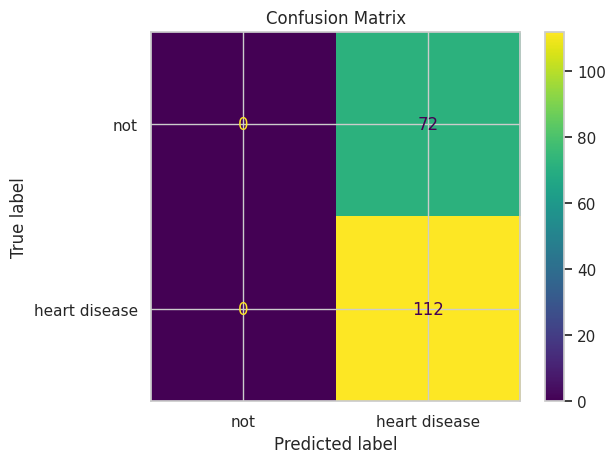

In [26]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred_majority)

# Plot confusion matrix
class_names = ['not', 'heart disease']
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()
plt.title('Confusion Matrix')


##KNN:

Before training the models, we are able to search for the best hyperparameters by fine-tuning the models, some might be better, and some might be worse.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],         # List of possible k values
    'weights': ['uniform', 'distance'],  # Different weight options
    'metric': ['euclidean', 'manhattan'] # Different distance metrics
}

# Create a k-NN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search on your data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

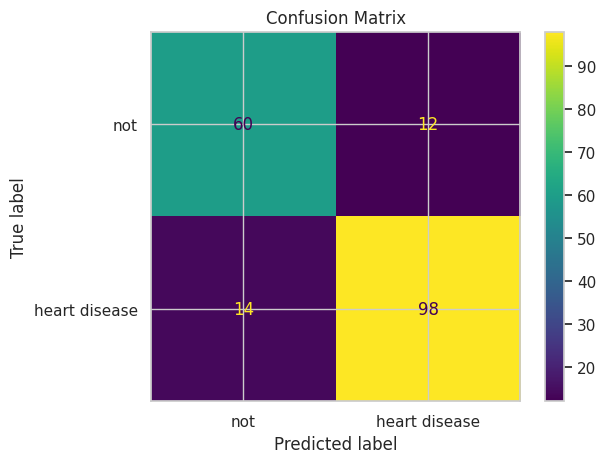

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the standard scaler and fit on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN model with k=3
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric = 'manhattan')

# Fit the model on the scaled training data
knn.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = knn.predict(X_test_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_names = ['not', 'heart disease']
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()
plt.title('Confusion Matrix')



In [29]:
from sklearn.metrics import classification_report

# Generate confusion matrix report
class_names = ['not', 'heart disease']
report = classification_report(y_test, y_pred, target_names=class_names)

accuracy = accuracy_score(y_test, y_pred)
model_accuracy['knn'] = accuracy

print("Confusion Matrix Report:\n", report)

Confusion Matrix Report:
                precision    recall  f1-score   support

          not       0.81      0.83      0.82        72
heart disease       0.89      0.88      0.88       112

     accuracy                           0.86       184
    macro avg       0.85      0.85      0.85       184
 weighted avg       0.86      0.86      0.86       184



##Decision trees:

Here we use randomized search due to the large amount of parameters.

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Decision Tree classifier




param_dist = {
    'max_depth': range(5, 30),
    'max_features': range(1, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_split' : range(2, 10),
    'min_samples_leaf' : range(1, 10)
}

dt_classifier = DecisionTreeClassifier()

random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

random_search.fit(X_train, y_train)

y_pred = random_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
model_accuracy['dec. tree'] = accuracy

print(f'Decision Tree Accuracy: {accuracy:.2f}')

Decision Tree Accuracy: 0.80


Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

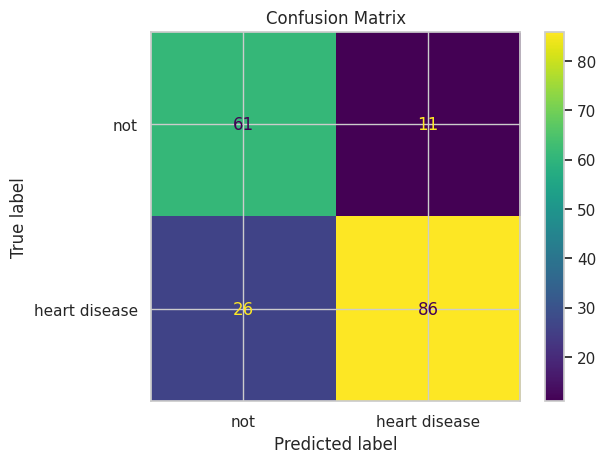

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_names = ['not', 'heart disease']
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()
plt.title('Confusion Matrix')

In [33]:
class_names = ['not', 'heart disease']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Confusion Matrix Report:\n", report)

Confusion Matrix Report:
                precision    recall  f1-score   support

          not       0.70      0.85      0.77        72
heart disease       0.89      0.77      0.82       112

     accuracy                           0.80       184
    macro avg       0.79      0.81      0.80       184
 weighted avg       0.81      0.80      0.80       184



##Random forests:

In [34]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=50)


In [35]:
model_grid = RandomForestClassifier(max_depth=3, max_leaf_nodes=9, n_estimators=50, random_state=42)
model_grid.fit(X_train, y_train)
y_pred_grid = model_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_grid)
model_accuracy['rand for.'] = accuracy
print(classification_report(y_pred_grid, y_test, target_names=class_names))

               precision    recall  f1-score   support

          not       0.83      0.81      0.82        74
heart disease       0.88      0.89      0.88       110

     accuracy                           0.86       184
    macro avg       0.85      0.85      0.85       184
 weighted avg       0.86      0.86      0.86       184



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

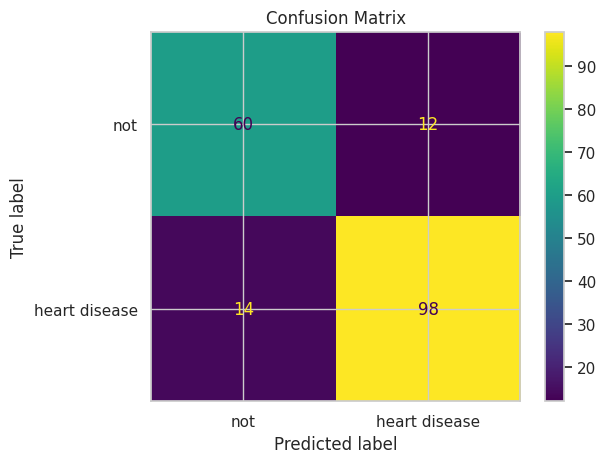

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred_grid)

# Plot confusion matrix

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()
plt.title('Confusion Matrix')

##XgBoost Tree


In [37]:
import xgboost as xgb
param_dist = {
    'max_depth': np.arange(2, 20),
    'reg_alpha': np.arange(0, 3, 0.1),
    'reg_lambda' : np.arange(0, 3, 0.1),
    'learning_rate' : np.arange(0.1, 1, 0.05),
    'n_estimators' : np.arange(1, 101, 5)
}

xgb_classifier = xgb.XGBClassifier()

random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=25, cv=5, random_state=42)

random_search.fit(X_train, y_train)

y_pred = random_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
model_accuracy['xgb'] = accuracy

print(f'Xgboost tree accuracy: {accuracy:.2f}')

Xgboost tree accuracy: 0.87


               precision    recall  f1-score   support

          not       0.85      0.82      0.84        74
heart disease       0.88      0.90      0.89       110

     accuracy                           0.87       184
    macro avg       0.87      0.86      0.86       184
 weighted avg       0.87      0.87      0.87       184



<Figure size 800x600 with 0 Axes>

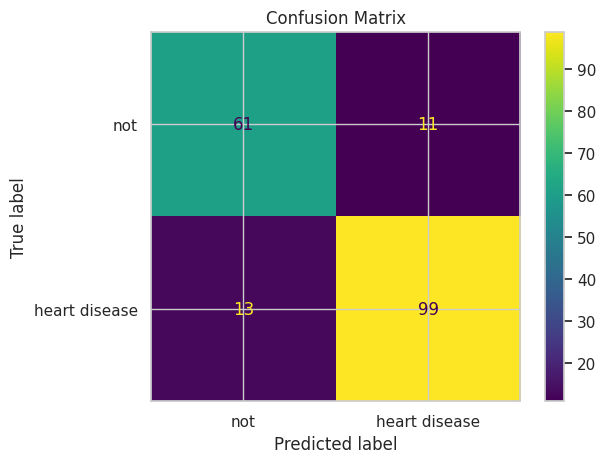

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['not', 'heart disease']
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()
plt.title('Confusion Matrix')
print(classification_report(y_pred, y_test, target_names = class_names))

##Support Vector Machines(SVM)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 5)

gamma_range = np.logspace(-9, 3, 5)

param_grid = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

grid.fit(X_train, y_train)

# Predict on the training data
y_train_pred = grid.predict(X_train)

# Predict on the test data
y_test_pred = grid.predict(X_test)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy['SVM'] = test_accuracy
#print accuracy
print(f'SVM Accuracy: {test_accuracy:.2f}')
print(classification_report(y_test_pred, y_test, target_names = class_names))

SVM Accuracy: 0.81
               precision    recall  f1-score   support

          not       0.81      0.73      0.77        79
heart disease       0.81      0.87      0.84       105

     accuracy                           0.81       184
    macro avg       0.81      0.80      0.80       184
 weighted avg       0.81      0.81      0.81       184



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

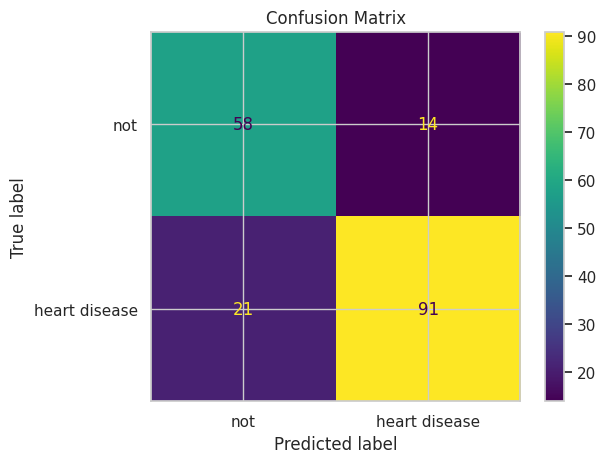

In [40]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()
plt.title('Confusion Matrix')

##Random forest without hyper parameter tuning

Accuracy: 0.8859
Classification Report:
               precision    recall  f1-score   support

          not       0.86      0.85      0.86        73
heart disease       0.90      0.91      0.91       111

     accuracy                           0.89       184
    macro avg       0.88      0.88      0.88       184
 weighted avg       0.89      0.89      0.89       184



<Figure size 800x600 with 0 Axes>

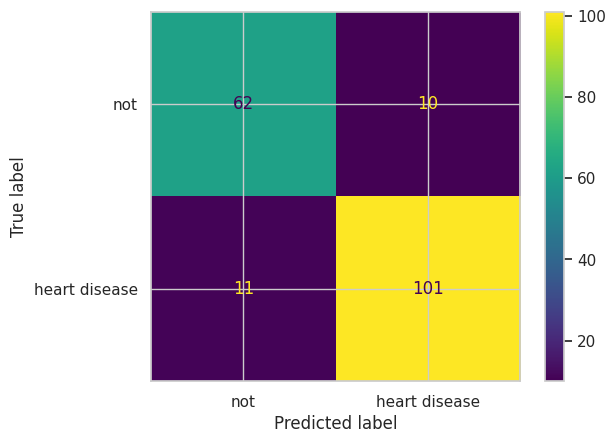

In [41]:
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix

plt.figure(figsize=(8, 6))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()

print("Classification Report:")
print(classification_report(y_pred, y_test, target_names = class_names))
model_accuracy['no hyper rand.'] = accuracy

##Default xgboost tree


              precision    recall  f1-score   support

           0       0.82      0.83      0.83        71
           1       0.89      0.88      0.89       113

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy: 0.8641


<Figure size 800x600 with 0 Axes>

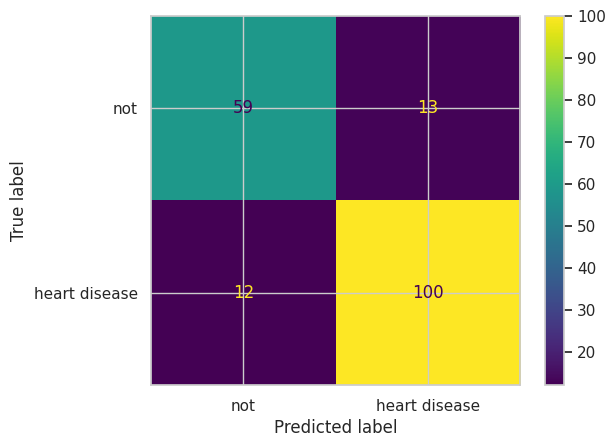

In [43]:
xgb_clf = xgb.XGBClassifier(random_state=42)

xgb_clf.fit(X_train, y_train)

y_xgb = xgb_clf.predict(X_test)

print(classification_report(y_xgb, y_test))

conf_matrix = confusion_matrix(y_test, y_xgb)

# Plot confusion matrix

plt.figure(figsize=(8, 6))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()

accuracy = accuracy_score(y_test, y_xgb)
print(f"Accuracy: {accuracy:.4f}")

model_accuracy['def xgb'] = accuracy


##default decision tree:

Accuracy: 0.7989130434782609
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        91
           1       0.75      0.90      0.82        93

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



<Figure size 800x600 with 0 Axes>

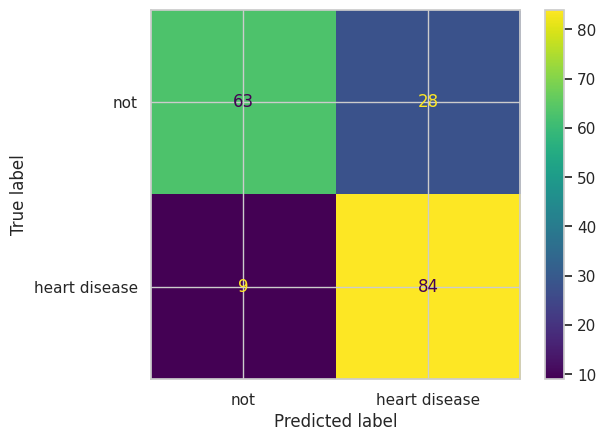

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#making the instance
model= DecisionTreeClassifier(random_state=42)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)

#evaluation(Accuracy)
accuracy = metrics.accuracy_score(prediction,y_test)
print("Accuracy:", accuracy)
#evaluation(Confusion Metrix)
conf_matrix =metrics.confusion_matrix(prediction,y_test)

plt.figure(figsize=(8, 6))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()

print(classification_report(prediction, y_test))

model_accuracy['def dec.'] = accuracy



##Default KNN

Accuracy: 0.6630434782608695
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        86
           1       0.66      0.76      0.70        98

    accuracy                           0.66       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.66      0.66      0.66       184



<Figure size 800x600 with 0 Axes>

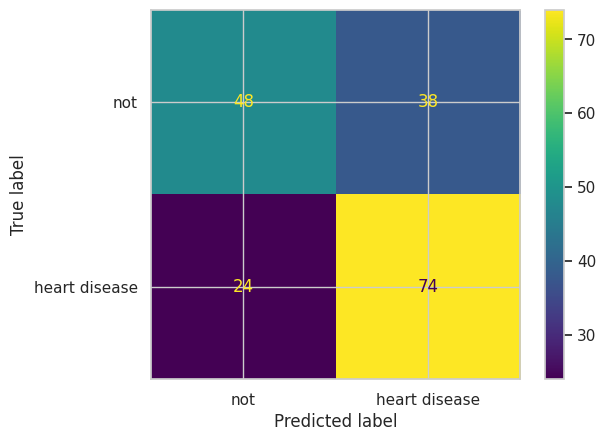

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#making the instance
model = KNeighborsClassifier()
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module

#evaluation(Accuracy)
accuracy = metrics.accuracy_score(prediction,y_test)
print("Accuracy:", accuracy)
#evaluation(Confusion Metrix)
conf_matrix = metrics.confusion_matrix(prediction,y_test)


plt.figure(figsize=(8, 6))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.plot()


print(classification_report(prediction, y_test))

model_accuracy['def knn'] = accuracy

#Conclusion:


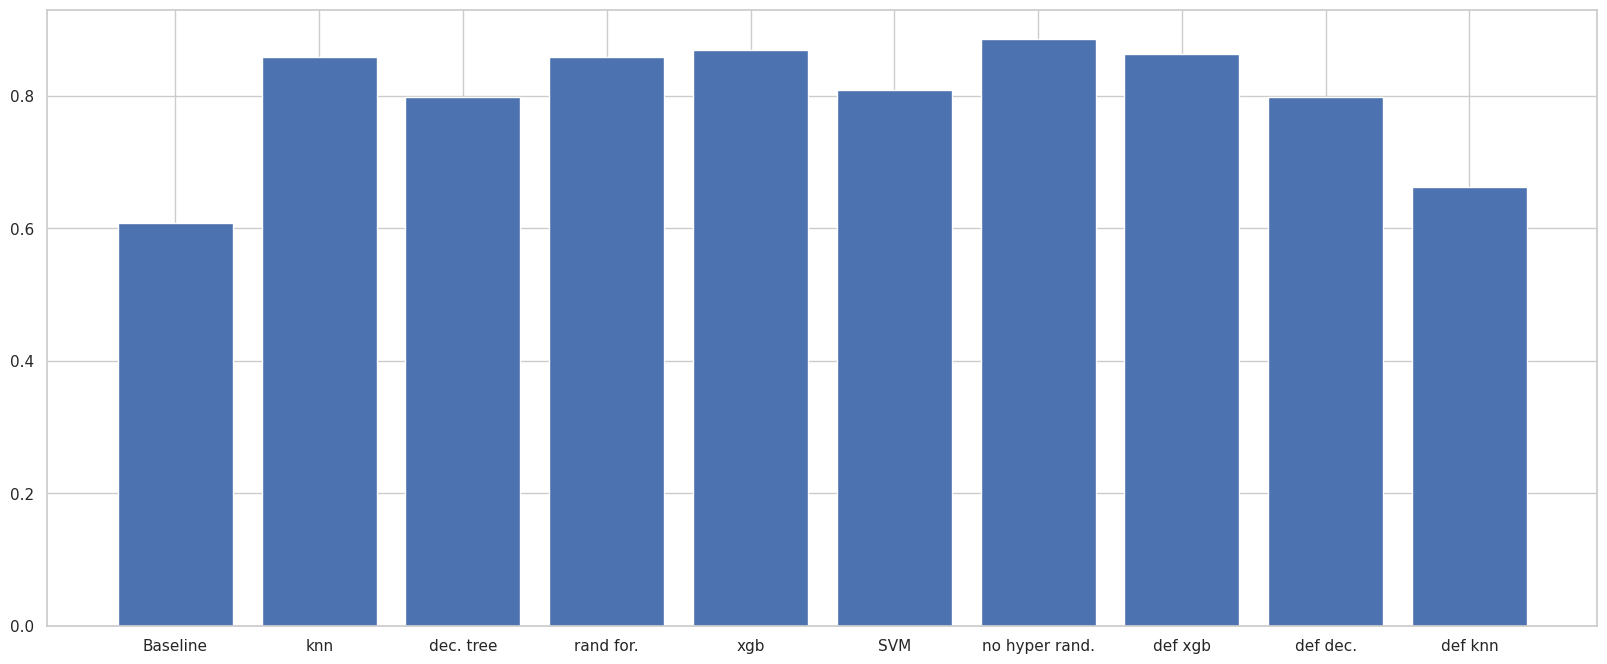

{'Baseline': 0.6086956521739131, 'knn': 0.8586956521739131, 'dec. tree': 0.7989130434782609, 'rand for.': 0.8586956521739131, 'xgb': 0.8695652173913043, 'SVM': 0.8097826086956522, 'no hyper rand.': 0.8858695652173914, 'def xgb': 0.8641304347826086, 'def dec.': 0.7989130434782609, 'def knn': 0.6630434782608695}


In [47]:
import matplotlib.pyplot as plt

D = model_accuracy

plt.figure(figsize=(20, 8))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()
print(D)

Since, knn, decision trees, random forests, and xg boost trees all have similar accuracies, we will look at the one, which has the highest recall, because we don't want to miss patients, which may have heart disease.

The default random forest has both the best recall and accuracy, so it's the better model for this task.

